In [1]:
# XGBOOST


from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

RSEED=42

In [2]:
data = pd.read_csv('data/cleaned_data.csv')

data.head()

,state,slug,launched_at_weekday,launched_at_month,duration_days,goal_in_usd,north_america
0,1,10,2,12,45,200.0,1
1,1,0,2,2,20,400.0,1
2,1,11,1,11,30,27224.0,1
3,1,5,5,10,41,45461.0,0
4,0,13,0,3,30,1000.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201236 entries, 0 to 201235
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   state                201236 non-null  int64  
 1   slug                 201236 non-null  int64  
 2   launched_at_weekday  201236 non-null  int64  
 3   launched_at_month    201236 non-null  int64  
 4   duration_days        201236 non-null  int64  
 5   goal_in_usd          201236 non-null  float64
 6   north_america        201236 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 10.7 MB


In [4]:
# define target and features variables

X = data.drop('state', axis=1)
y = data.state

In [5]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

In [6]:
# fit model to training data

xgb = XGBClassifier(random_state=RSEED,
                    n_jobs=-1,
                    n_estimators=300,
                    learning_rate=0.1,
                    subsample=0.5,
                    max_depth=13,
                    colsample_bytree=0.85
                    )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [7]:
# Make predictions on test set
y_pred = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.66      0.53      0.59     25135
           1       0.71      0.81      0.75     35236

    accuracy                           0.69     60371
   macro avg       0.68      0.67      0.67     60371
weighted avg       0.69      0.69      0.68     60371

[[13336 11799]
 [ 6846 28390]]


<Axes: >

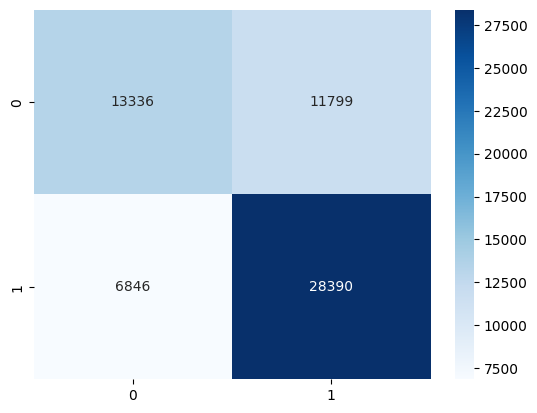

In [8]:
# model evaluation
 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')